In [1]:
# https://medium.com/analytics-vidhya/deep-reinforcement-learning-using-proximal-policy-optimization-7555280ef941

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sys import argv
import matplotlib.ticker as mtick
import copy
import os
import glob
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
get_ipython().run_line_magic("matplotlib", "inline")
pd.set_option("display.max_columns", None)



/tmp/ipykernel_220317/2968859073.py:13: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


<IPython.core.display.Javascript object>

# BPIC2017

zahra
-9721

metzger
-89010

mahmoud
18326

-9721
-89010
18326


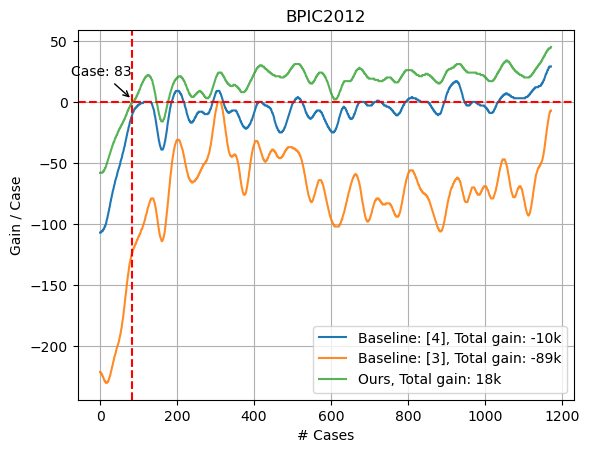

zahra
-134809

metzger
-2153627

mahmoud
107458

-134809
-2153627
107458


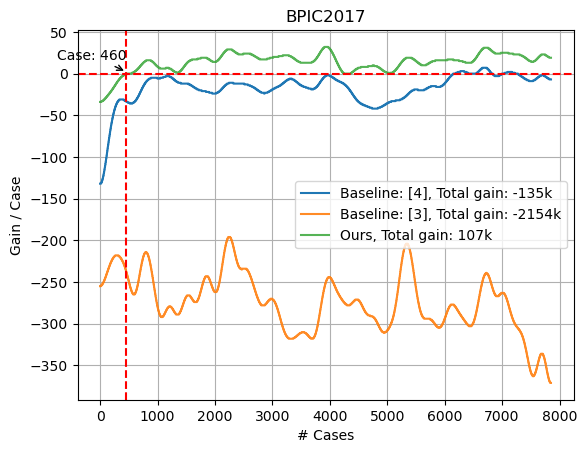

zahra
739658

metzger
592239

mahmoud
740249

739658
592239
740249


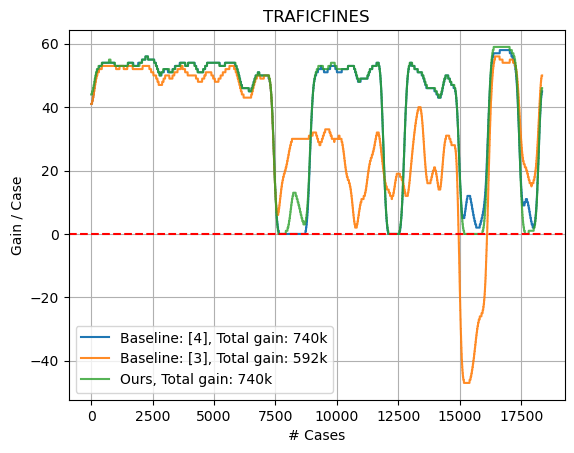

<IPython.core.display.Javascript object>

In [3]:
dfs = []

datasets = ["bpic2012", "bpic2017", "traficFines"]

for dataset_name in datasets:
    directory = os.path.join(
        "./results/%s/%s/%sResults/" % (dataset_name, dataset_name, dataset_name)
    )
    for root, dirs, files in os.walk(directory):
        title = root
        for dirr in dirs:
            path = directory + dirr
            csv_files = glob.glob(os.path.join(path, "*.csv"))
            for f in csv_files:
                df = pd.read_csv(f, sep=";")
                df.name = str(f).split("/")[5]
                if df.name == "metzgeradaptedtozahra":
                    continue
                dfs.append(df)

    gains = {}  # {name: df.gain}
    sum_gaines = {}  # {nr_resource: sum(df.gain)}

    def millions(x, pos):
        "The two args are the value and tick position"
        return "%1.1fK" % (x * 1e-3)

    for df in dfs:
        if dataset_name == "bpic2012":
            sig = 12
        else:
            sig = 100
        gains[df.name] = gaussian_filter1d(df.gain, sigma=sig)
        try:
            sum_gaines[int(df.name)] = sum(df.gain)
        except:
            sum_gaines[df.name] = sum(df.gain)

    for k, v in gains.items():
        print(k)
        print(sum(v))
        print("")

    # cost = 25
    xx = 1
    for k, v in gains.items():

        if k == "metzger" or k == "metzgeradaptedtozahra":
            l = "Baseline: [3]"
            k = "metzger"
        elif k == "zahra":
            l = "Baseline: [4]"
        else:
            l = "Ours"

        # Calculate the sum of y
        sum_y = sum(v)
        x = list(range(1, len(v) + 1))
        print(sum_y)
        plt.plot(v, label=l + ", Total gain: {:.0f}k".format(sum_y / 1000), alpha=xx)

        xx = xx - 0.1

    formatter = FuncFormatter(millions)

    plt.grid(True)
    plt.legend(loc="best")
    plt.ylabel("Gain / Case")
    plt.xlabel("# Cases")
    plt.title(f"{dataset_name.upper()}")
    plt.axhline(y=0, color="red", linestyle="--")

    # Find index where y crosses zero
    zero_crossing_index = np.where(np.diff(np.signbit(v)))[0]
    # Check if there is a zero crossing
    if len(zero_crossing_index) > 0:
        # Retrieve the x-value at the zero crossing index
        x_zero = zero_crossing_index[0]

        # Add vertical line at x_zero
        plt.axvline(x=x_zero, color="red", linestyle="--")

        plt.annotate(
            f"Case: {x_zero}",
            xy=(x_zero, 2),
            xytext=(x_zero, 30),
            color="black",
            arrowprops=dict(facecolor="black", arrowstyle="->"),
            ha="right",
            va="top",
        )

    plt.show()